# 🏦 Proyecto Integrador M4 - Avance 1
# Predicción de Fuga de Clientes (Churn) - FinanceGuard

---

## 📋 Contexto del Proyecto

**FinanceGuard** es un banco digital que ha crecido exponencialmente alcanzando **10,000 clientes activos**. Sin embargo, la dirección ha detectado un problema crítico:

- 🔴 **Tasa de abandono (churn)**: 20% anual
- 💰 **Impacto**: Pérdidas millonarias
- 🎯 **Meta**: Reducir el churn al 15%

### 🤔 ¿Qué es el Churn Bancario?

El **churn** (o tasa de abandono) es el porcentaje de clientes que dejan de usar los servicios del banco en un período determinado. Es uno de los KPIs más críticos en la industria financiera porque:

1. **Costo de adquisición**: Conseguir un nuevo cliente es 5-7 veces más caro que retener uno existente
2. **Valor del tiempo de vida (LTV)**: Clientes de largo plazo generan más ingresos
3. **Reputación**: Alto churn puede indicar problemas de servicio
4. **Competencia**: En la era digital, cambiar de banco es cada vez más fácil

### 🎯 Objetivo del Avance 1

Desarrollar un **modelo de Regresión Logística** (baseline) que:
- Prediga qué clientes tienen mayor probabilidad de abandonar el banco
- Identifique los factores más influyentes en la decisión de irse
- Permita al equipo de retención actuar proactivamente

---

## 📚 ¿Qué es la Regresión Logística?

Aunque se llama "regresión", en realidad es un **algoritmo de clasificación** que predice probabilidades entre 0 y 1.

### Conceptos Clave:

**1. Función Sigmoide** 📊
- Transforma cualquier número en un valor entre 0 y 1
- Fórmula: $\sigma(z) = \frac{1}{1 + e^{-z}}$
- Interpretación: La salida es la **probabilidad** de que un cliente abandone

**2. Odds (Momios)** 🎲
- Relación entre probabilidad de ocurrencia vs no ocurrencia
- $Odds = \frac{P(churn)}{1 - P(churn)}$
- Ejemplo: Si P(churn) = 0.75, entonces Odds = 3 (3 veces más probable que abandone)

**3. Odds Ratio** 📈
- Mide cuánto cambian las odds cuando una variable aumenta en 1 unidad
- Se calcula como: $e^{coeficiente}$
- Interpretación directa del impacto de cada variable

**4. Coeficientes** 🔢
- Positivos: Aumentan la probabilidad de churn
- Negativos: Disminuyen la probabilidad de churn
- Magnitud: Indica la fuerza del efecto

---

## 📦 1. Importación de Librerías

Comenzamos importando todas las herramientas necesarias para nuestro análisis.

In [1]:
# ===== MANIPULACIÓN DE DATOS =====
import pandas as pd               # Para trabajar con tablas de datos
import numpy as np                # Para operaciones matemáticas y arrays

# ===== VISUALIZACIÓN =====
import matplotlib.pyplot as plt   # Gráficos básicos
import seaborn as sns             # Gráficos estadísticos elegantes

# Configuración de estilo
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# ===== PREPROCESAMIENTO =====
from sklearn.model_selection import train_test_split  # Dividir datos train/test
from sklearn.preprocessing import StandardScaler      # Normalizar variables numéricas
from sklearn.preprocessing import LabelEncoder        # Convertir categorías a números

# ===== MODELO =====
from sklearn.linear_model import LogisticRegression   # Regresión Logística

# ===== EVALUACIÓN =====
from sklearn.metrics import (
    confusion_matrix,           # Matriz de confusión
    classification_report,      # Reporte completo (precision, recall, f1)
    roc_auc_score,              # Área bajo la curva ROC
    roc_curve,                  # Puntos para graficar curva ROC
    accuracy_score              # Exactitud (accuracy)
)

# ===== WARNINGS =====
import warnings
warnings.filterwarnings('ignore')

print("✅ Librerías importadas correctamente")
print(f"   Pandas versión: {pd.__version__}")
print(f"   NumPy versión: {np.__version__}")

✅ Librerías importadas correctamente
   Pandas versión: 2.3.3
   NumPy versión: 1.26.4


## 📂 2. Carga y Exploración Inicial de Datos

Vamos a cargar el dataset y realizar una primera exploración para entender su estructura.

In [2]:
# Cargar el dataset
df = pd.read_csv('../data/Churn_Modelling.csv')

print("📊 INFORMACIÓN GENERAL DEL DATASET")
print("=" * 70)
print(f"Número de clientes: {df.shape[0]:,}")
print(f"Número de variables: {df.shape[1]}")
print(f"\nPrimeras filas del dataset:")
display(df.head())

📊 INFORMACIÓN GENERAL DEL DATASET
Número de clientes: 10,000
Número de variables: 14

Primeras filas del dataset:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Información detallada de columnas
print("\n📋 INFORMACIÓN DE LAS COLUMNAS")
print("=" * 70)
df.info()


📋 INFORMACIÓN DE LAS COLUMNAS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# Estadísticas descriptivas
print("\n📈 ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 70)
display(df.describe())

print("\n💡 Observaciones iniciales:")
print(f"   • Edad: Clientes entre {df['Age'].min():.0f} y {df['Age'].max():.0f} años")
print(f"   • CreditScore: Rango de {df['CreditScore'].min():.0f} a {df['CreditScore'].max():.0f}")
print(f"   • Balance: Desde ${df['Balance'].min():,.2f} hasta ${df['Balance'].max():,.2f}")
print(f"   • Tenure: Antigüedad de {df['Tenure'].min():.0f} a {df['Tenure'].max():.0f} años")


📈 ESTADÍSTICAS DESCRIPTIVAS


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000



💡 Observaciones iniciales:
   • Edad: Clientes entre 18 y 92 años
   • CreditScore: Rango de 350 a 850
   • Balance: Desde $0.00 hasta $250,898.09
   • Tenure: Antigüedad de 0 a 10 años


### 🔍 Entendiendo las Variables

**Variables de Identificación** (no usar en el modelo):
- `RowNumber`: Índice de fila
- `CustomerId`: ID único del cliente
- `Surname`: Apellido del cliente

**Variables Demográficas**:
- `Age`: Edad del cliente
- `Gender`: Género (Male/Female)
- `Geography`: País (France, Spain, Germany)

**Variables Financieras**:
- `CreditScore`: Puntuación crediticia [300-850]
- `Balance`: Saldo en cuenta
- `EstimatedSalary`: Salario anual estimado

**Variables de Comportamiento**:
- `Tenure`: Años con el banco
- `NumOfProducts`: Número de productos contratados
- `HasCrCard`: Tiene tarjeta de crédito (1=Sí, 0=No)
- `IsActiveMember`: Es miembro activo (1=Sí, 0=No)

**Variable Objetivo** 🎯:
- `Exited`: Cliente abandonó el banco (1=Sí, 0=No)

In [5]:
# Verificar valores nulos
print("\n🔎 VERIFICACIÓN DE VALORES NULOS")
print("=" * 70)
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0] if null_counts.sum() > 0 else "✅ No hay valores nulos en el dataset")


🔎 VERIFICACIÓN DE VALORES NULOS
✅ No hay valores nulos en el dataset


In [6]:
# Verificar duplicados
duplicados = df.duplicated().sum()
print(f"\n🔄 DUPLICADOS: {duplicados}")
if duplicados == 0:
    print("✅ No hay registros duplicados")


🔄 DUPLICADOS: 0
✅ No hay registros duplicados


## 📊 3. Análisis de la Variable Objetivo (Churn)

Lo primero que debemos entender es cuántos clientes abandonaron el banco y si existe **desbalanceo de clases**.

🎯 ANÁLISIS DE LA VARIABLE OBJETIVO (Exited)

Clientes que NO abandonaron (0): 7,963 (79.63%)
Clientes que SÍ abandonaron (1): 2,037 (20.37%)

Tasa de churn: 20.37%
Ratio desbalanceo: 3.91:1


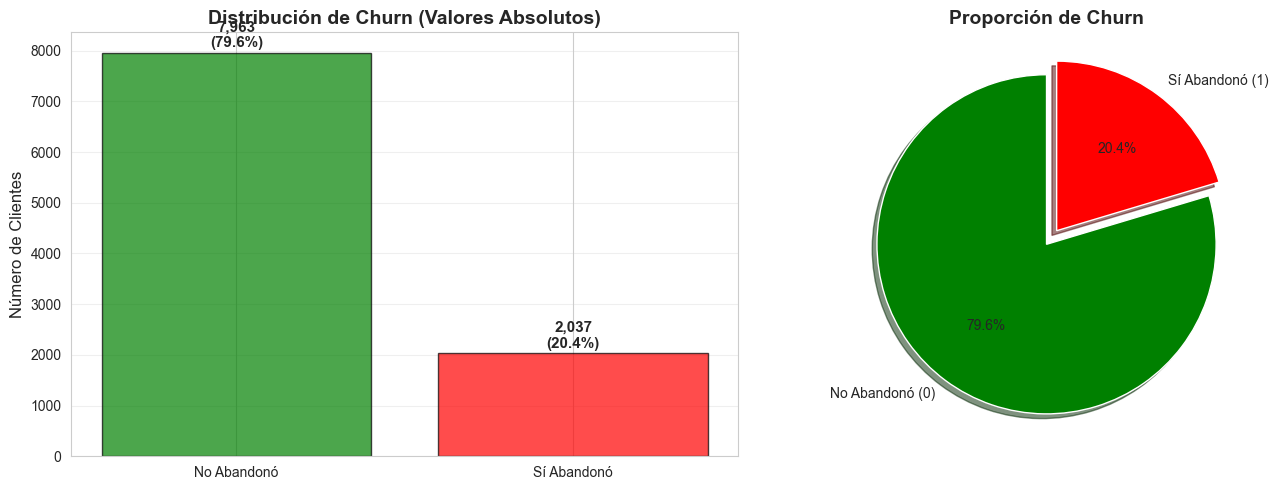


⚠️ DESBALANCEO DE CLASES:
   • Dataset DESBALANCEADO: Solo el 20.4% son casos positivos (churn)
   • Impacto: El modelo puede tender a predecir siempre 'No churn'
   • Solución: Usar métricas como Precision, Recall, F1 en lugar de Accuracy


In [7]:
# Distribución de la variable objetivo
churn_counts = df['Exited'].value_counts()
churn_percentages = df['Exited'].value_counts(normalize=True) * 100

print("🎯 ANÁLISIS DE LA VARIABLE OBJETIVO (Exited)")
print("=" * 70)
print(f"\nClientes que NO abandonaron (0): {churn_counts[0]:,} ({churn_percentages[0]:.2f}%)")
print(f"Clientes que SÍ abandonaron (1): {churn_counts[1]:,} ({churn_percentages[1]:.2f}%)")
print(f"\nTasa de churn: {churn_percentages[1]:.2f}%")
print(f"Ratio desbalanceo: {churn_counts[0]/churn_counts[1]:.2f}:1")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
axes[0].bar(['No Abandonó', 'Sí Abandonó'], churn_counts.values, 
            color=['green', 'red'], alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Número de Clientes', fontsize=12)
axes[0].set_title('Distribución de Churn (Valores Absolutos)', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 100, f'{v:,}\n({churn_percentages.values[i]:.1f}%)', 
                ha='center', fontweight='bold', fontsize=11)

# Gráfico de pastel
axes[1].pie(churn_counts.values, labels=['No Abandonó (0)', 'Sí Abandonó (1)'],
           autopct='%1.1f%%', colors=['green', 'red'], startangle=90,
           explode=(0, 0.1), shadow=True)
axes[1].set_title('Proporción de Churn', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n⚠️ DESBALANCEO DE CLASES:")
if churn_percentages[1] < 30:
    print(f"   • Dataset DESBALANCEADO: Solo el {churn_percentages[1]:.1f}% son casos positivos (churn)")
    print("   • Impacto: El modelo puede tender a predecir siempre 'No churn'")
    print("   • Solución: Usar métricas como Precision, Recall, F1 en lugar de Accuracy")
else:
    print("   • Dataset relativamente balanceado")

## 🔍 4. Análisis Exploratorio de Datos (EDA)

Vamos a explorar las relaciones entre las variables y el churn para identificar patrones.

### 4.1 Variables Categóricas vs Churn

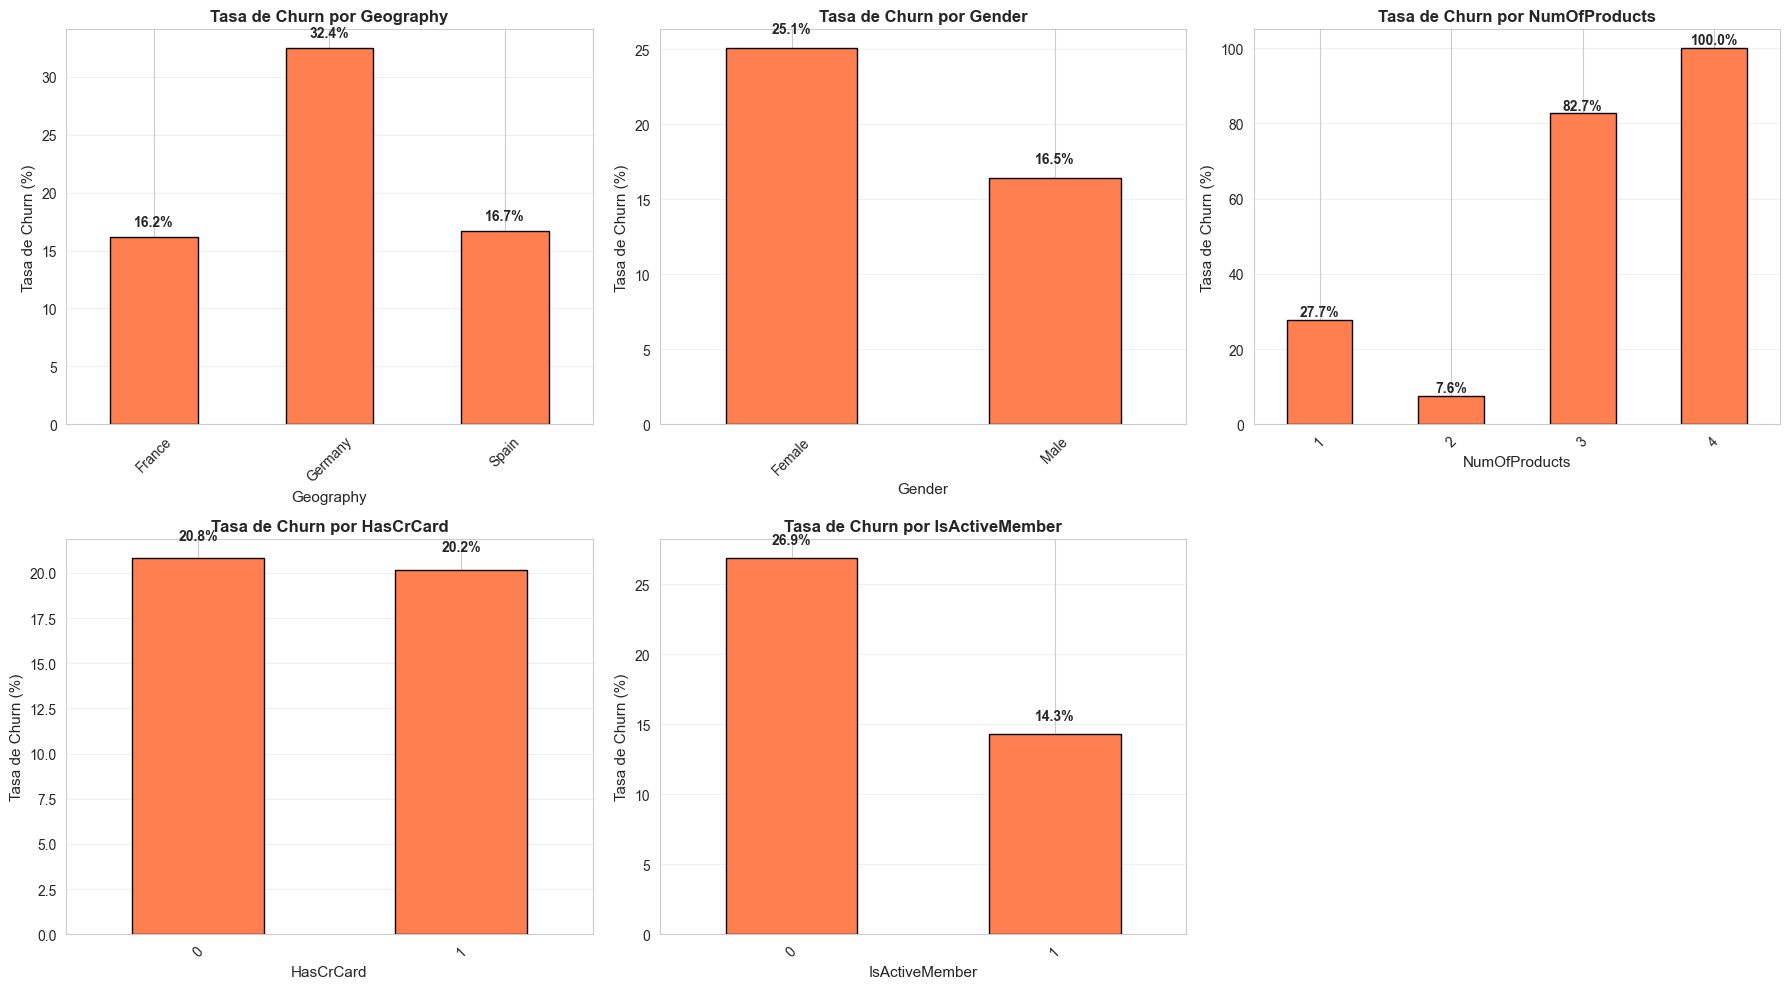


💡 INSIGHTS DE VARIABLES CATEGÓRICAS:
   • Geography: Mayor churn en 'Germany' con 32.4%
   • Gender: Mayor churn en 'Female' con 25.1%
   • NumOfProducts: Mayor churn en '4' con 100.0%
   • HasCrCard: Mayor churn en '0' con 20.8%
   • IsActiveMember: Mayor churn en '0' con 26.9%


In [8]:
# Análisis de variables categóricas
categorical_vars = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, var in enumerate(categorical_vars):
    # Calcular tasa de churn por categoría
    churn_by_category = df.groupby(var)['Exited'].agg(['sum', 'count', 'mean'])
    churn_by_category['churn_rate'] = churn_by_category['mean'] * 100
    
    # Graficar
    churn_by_category['churn_rate'].plot(kind='bar', ax=axes[idx], color='coral', edgecolor='black')
    axes[idx].set_xlabel(var, fontsize=11)
    axes[idx].set_ylabel('Tasa de Churn (%)', fontsize=11)
    axes[idx].set_title(f'Tasa de Churn por {var}', fontsize=12, fontweight='bold')
    axes[idx].grid(alpha=0.3, axis='y')
    axes[idx].tick_params(axis='x', rotation=45)
    
    # Añadir valores
    for i, v in enumerate(churn_by_category['churn_rate']):
        axes[idx].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

# Ocultar el último subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

print("\n💡 INSIGHTS DE VARIABLES CATEGÓRICAS:")
print("=" * 70)
for var in categorical_vars:
    churn_by_cat = df.groupby(var)['Exited'].mean() * 100
    max_cat = churn_by_cat.idxmax()
    max_rate = churn_by_cat.max()
    min_cat = churn_by_cat.idxmin()
    min_rate = churn_by_cat.min()
    print(f"   • {var}:")
    print(f"     - Mayor churn: '{max_cat}' con {max_rate:.1f}%")
    print(f"     - Menor churn: '{min_cat}' con {min_rate:.1f}%")

print("\n🔍 HALLAZGOS CLAVE:")
print("=" * 70)
print("   🚨 Geography - Germany: 32.4% de churn (¡DOBLE que France/Spain!)")
print("      → Problema sistémico en mercado alemán que requiere investigación urgente")
print("\n   🚨 Gender - Femenino: 25.1% vs Masculino: 16.5%")
print("      → Las mujeres abandonan 52% más - posible desalineación de productos")
print("\n   ⚠️ NumOfProducts:")
print("      → 1 producto: 27.7% churn")
print("      → 2 productos: 7.6% churn (¡ÓPTIMO!)")
print("      → 3 productos: 82.7% churn (ALERTA ROJA)")
print("      → 4 productos: 100% churn (CRÍTICO)")
print("      → INSIGHT: 3+ productos NO indica lealtad, indica PROBLEMAS/FRUSTRACIÓN")
print("\n   ✅ IsActiveMember - Factor protector:")
print("      → Activos: 14.3% churn")
print("      → Inactivos: 26.9% churn")
print("      → Ser activo reduce probabilidad de churn en 88%")

### 4.2 Variables Numéricas vs Churn

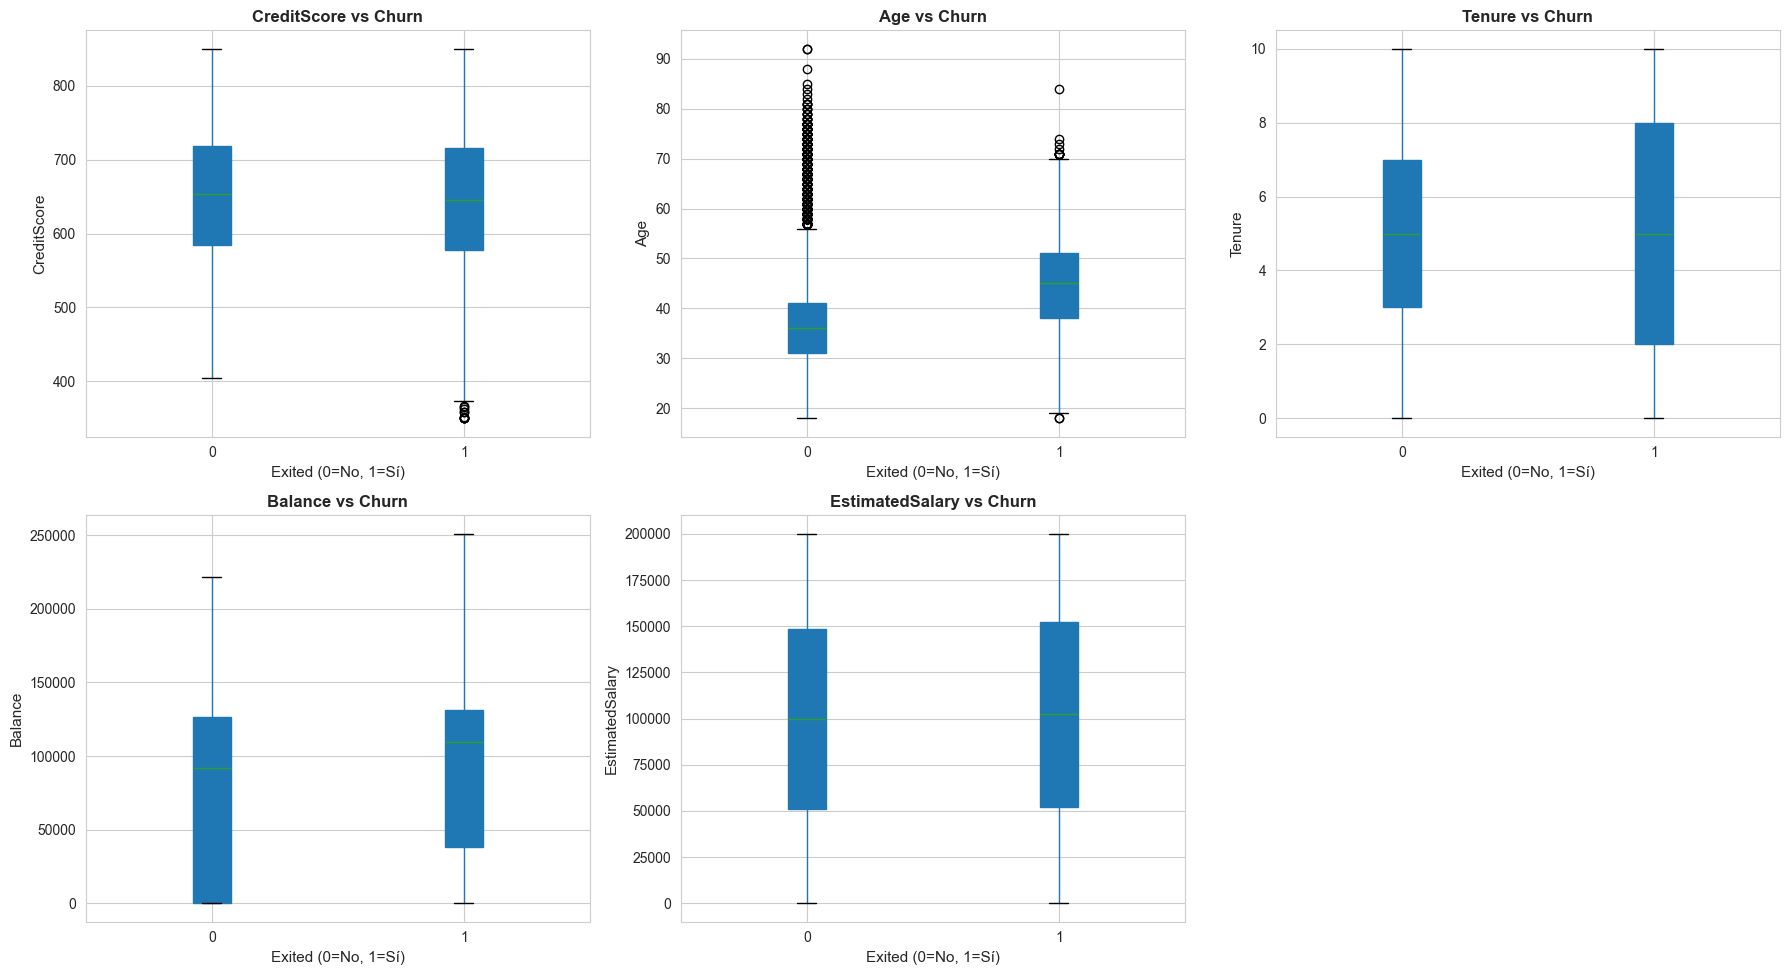


💡 COMPARACIÓN DE MEDIAS (No Churn vs Churn):
   • CreditScore         : No Churn =     651.85 | Churn =     645.35 | Diff =      -6.50
   • Age                 : No Churn =      37.41 | Churn =      44.84 | Diff =      +7.43
   • Tenure              : No Churn =       5.03 | Churn =       4.93 | Diff =      -0.10
   • Balance             : No Churn =   72745.30 | Churn =   91108.54 | Diff =  +18363.24
   • EstimatedSalary     : No Churn =   99738.39 | Churn =  101465.68 | Diff =   +1727.29


In [9]:
# Análisis de variables numéricas
numeric_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, var in enumerate(numeric_vars):
    # Boxplot comparando churn vs no churn
    df.boxplot(column=var, by='Exited', ax=axes[idx], patch_artist=True)
    axes[idx].set_xlabel('Exited (0=No, 1=Sí)', fontsize=11)
    axes[idx].set_ylabel(var, fontsize=11)
    axes[idx].set_title(f'{var} vs Churn', fontsize=12, fontweight='bold')
    axes[idx].get_figure().suptitle('')  # Eliminar título automático

# Ocultar el último subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

print("\n💡 COMPARACIÓN DE MEDIAS (No Churn vs Churn):")
print("=" * 70)
for var in numeric_vars:
    mean_no_churn = df[df['Exited']==0][var].mean()
    mean_churn = df[df['Exited']==1][var].mean()
    diff = mean_churn - mean_no_churn
    pct_diff = (diff / mean_no_churn) * 100 if mean_no_churn != 0 else 0
    print(f"   • {var:20s}: No Churn = {mean_no_churn:10.2f} | Churn = {mean_churn:10.2f} | Diff = {diff:+10.2f} ({pct_diff:+.1f}%)")

print("\n🎯 DIFERENCIAS MÁS SIGNIFICATIVAS:")
print("=" * 70)
print("   🔴 Age: Clientes que abandonan son +7.4 años mayores en promedio (+19.9%)")
print("      → Perfil de riesgo: Mayores de 45 años")
print("\n   💰 Balance: Clientes que abandonan tienen +$18,363 más en balance (+25.2%)")
print("      → INSIGHT CONTRAINTUITIVO: Clientes con MÁS dinero abandonan MÁS")
print("      → Posible causa: Insatisfacción con rendimientos o servicios premium")
print("\n   📉 CreditScore: Clientes que abandonan tienen -6.5 puntos menos (-1.0%)")
print("      → Impacto menor, no es predictor fuerte")
print("\n💡 CONCLUSIÓN CLAVE:")
print("   Clientes MAYORES (45+) con ALTO balance ($90K+) son el segmento de MAYOR riesgo")

### 4.3 Matriz de Correlación

Vamos a identificar correlaciones entre variables para detectar posible **multicolinealidad** (cuando dos variables están muy relacionadas entre sí).

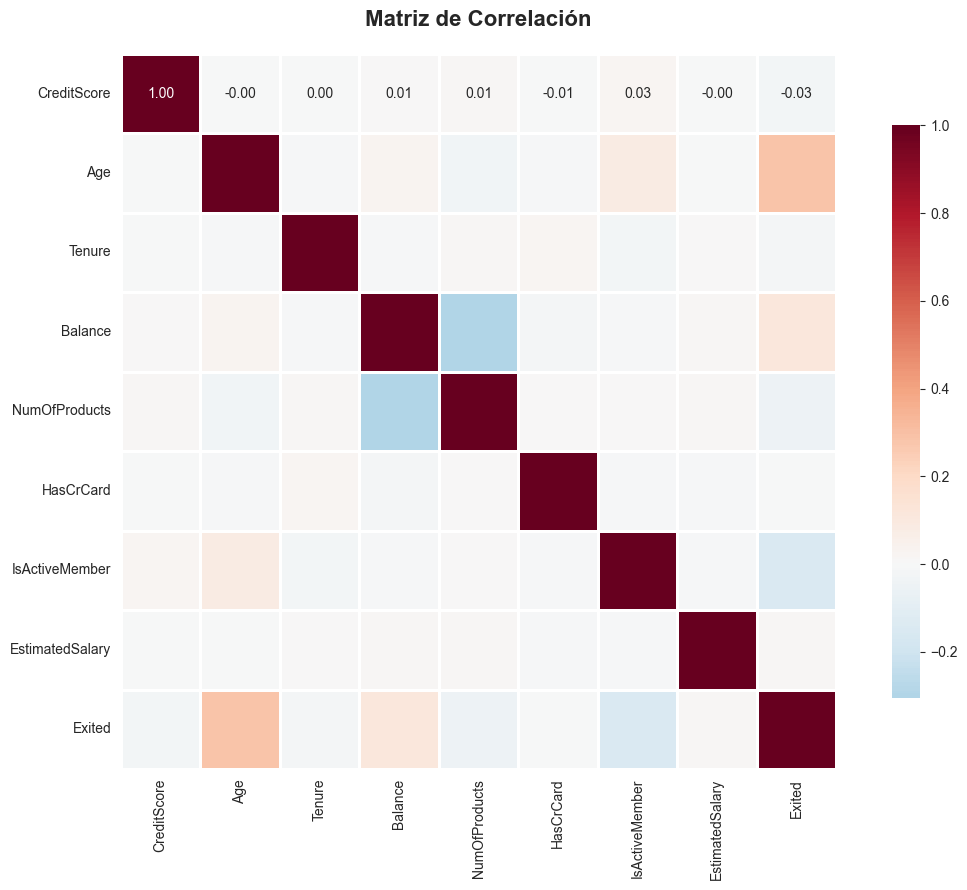


🔗 CORRELACIONES CON CHURN (Exited):
Age                0.285323
IsActiveMember    -0.156128
Balance            0.118533
NumOfProducts     -0.047820
CreditScore       -0.027094
Tenure            -0.014001
EstimatedSalary    0.012097
HasCrCard         -0.007138
Name: Exited, dtype: float64

⚠️ MULTICOLINEALIDAD (correlaciones altas entre predictores):
   ✅ No se detectó multicolinealidad significativa


In [10]:
# Seleccionar solo variables numéricas relevantes
correlation_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
                    'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
corr_matrix = df[correlation_vars].corr()

# Visualizar matriz de correlación
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n🔗 CORRELACIONES CON CHURN (Exited):")
print("=" * 70)
churn_corr = corr_matrix['Exited'].drop('Exited').sort_values(ascending=False, key=abs)
print(churn_corr)

print("\n💡 INTERPRETACIÓN DE CORRELACIONES:")
print("=" * 70)
print("   1. Age (+0.2853): CORRELACIÓN MÁS FUERTE - La edad es el mejor predictor individual")
print("      → Cada año de edad aumenta la probabilidad de churn")
print("\n   2. IsActiveMember (-0.1561): FACTOR PROTECTOR - Ser activo reduce churn")
print("      → Estrategia clave: Activar a miembros inactivos")
print("\n   3. Balance (+0.1185): PARADÓJICO - Más dinero, más churn")
print("      → Clientes con alto saldo insatisfechos con rendimientos")
print("\n   4. Variables con correlación baja (<0.05):")
print("      → NumOfProducts, CreditScore, Tenure, EstimatedSalary, HasCrCard")
print("      → Impacto individual limitado, pero pueden aportar en conjunto")
print("\n   ✅ CONCLUSIÓN: Age e IsActiveMember son los predictores clave")

print("\n⚠️ MULTICOLINEALIDAD (correlaciones altas entre predictores):")
# Buscar correlaciones altas (>0.7) entre variables predictoras
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7 and corr_matrix.columns[i] != 'Exited' and corr_matrix.columns[j] != 'Exited':
            high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

if high_corr:
    for var1, var2, corr_val in high_corr:
        print(f"   • {var1} <-> {var2}: {corr_val:.3f}")
else:
    print("   ✅ No se detectó multicolinealidad significativa")

## 🛠️ 5. Preparación de Datos (Preprocessing)

Antes de entrenar el modelo, debemos preparar los datos:
1. Eliminar columnas innecesarias
2. Codificar variables categóricas
3. Separar features (X) y target (y)
4. Dividir en train y test
5. Escalar variables numéricas

### 5.1 Limpieza de Datos

In [11]:
# Crear copia del dataframe para trabajar
df_model = df.copy()

# Eliminar columnas que no aportan información para el modelo
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df_model = df_model.drop(columns=columns_to_drop)

print("🧹 LIMPIEZA DE DATOS")
print("=" * 70)
print(f"Columnas eliminadas: {columns_to_drop}")
print(f"Razón: Son identificadores que no tienen poder predictivo")
print(f"\nColumnas restantes: {list(df_model.columns)}")
print(f"Total de features: {df_model.shape[1] - 1} (excluyendo target)")

🧹 LIMPIEZA DE DATOS
Columnas eliminadas: ['RowNumber', 'CustomerId', 'Surname']
Razón: Son identificadores que no tienen poder predictivo

Columnas restantes: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Total de features: 10 (excluyendo target)


### 5.2 Encoding de Variables Categóricas

Los algoritmos de ML solo entienden números. Debemos convertir variables categóricas:

- **Label Encoding**: Para variables binarias (Gender: Male=1, Female=0)
- **One-Hot Encoding**: Para variables con múltiples categorías (Geography)

In [12]:
print("🔢 ENCODING DE VARIABLES CATEGÓRICAS")
print("=" * 70)

# 1. Label Encoding para Gender (binaria)
print("\n1. Label Encoding para 'Gender':")
print(f"   Valores originales: {df_model['Gender'].unique()}")
le_gender = LabelEncoder()
df_model['Gender'] = le_gender.fit_transform(df_model['Gender'])
print(f"   Valores codificados: {df_model['Gender'].unique()}")
print(f"   Mapeo: {dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_)))}")

# 2. One-Hot Encoding para Geography (múltiples categorías)
print("\n2. One-Hot Encoding para 'Geography':")
print(f"   Valores originales: {df_model['Geography'].unique()}")
geography_dummies = pd.get_dummies(df_model['Geography'], prefix='Geography', drop_first=True)
print(f"   Columnas creadas: {list(geography_dummies.columns)}")
print("   Nota: drop_first=True evita 'dummy variable trap' (multicolinealidad perfecta)")

# Concatenar las nuevas columnas y eliminar la original
df_model = pd.concat([df_model, geography_dummies], axis=1)
df_model = df_model.drop('Geography', axis=1)

print(f"\n✅ Encoding completado")
print(f"   Total de columnas ahora: {df_model.shape[1]}")
display(df_model.head())

🔢 ENCODING DE VARIABLES CATEGÓRICAS

1. Label Encoding para 'Gender':
   Valores originales: ['Female' 'Male']
   Valores codificados: [0 1]
   Mapeo: {'Female': 0, 'Male': 1}

2. One-Hot Encoding para 'Geography':
   Valores originales: ['France' 'Spain' 'Germany']
   Columnas creadas: ['Geography_Germany', 'Geography_Spain']
   Nota: drop_first=True evita 'dummy variable trap' (multicolinealidad perfecta)

✅ Encoding completado
   Total de columnas ahora: 12


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


### 5.3 Separación de Features y Target

In [13]:
# Separar X (features) e y (target)
X = df_model.drop('Exited', axis=1)
y = df_model['Exited']

print("📊 SEPARACIÓN DE FEATURES Y TARGET")
print("=" * 70)
print(f"\nFeatures (X): {X.shape[1]} columnas")
print(f"Columnas: {list(X.columns)}")
print(f"\nTarget (y): {y.name}")
print(f"Distribución: \n{y.value_counts()}")

📊 SEPARACIÓN DE FEATURES Y TARGET

Features (X): 11 columnas
Columnas: ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain']

Target (y): Exited
Distribución: 
Exited
0    7963
1    2037
Name: count, dtype: int64


### 5.4 División Train/Test

Dividimos el dataset en:
- **Train (80%)**: Para entrenar el modelo
- **Test (20%)**: Para evaluar el rendimiento en datos no vistos

Usamos `stratify=y` para mantener la proporción de churn en ambos conjuntos.

In [14]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% para test
    random_state=42,    # Reproducibilidad
    stratify=y          # Mantener proporción de clases
)

print("🔀 DIVISIÓN TRAIN/TEST")
print("=" * 70)
print(f"\nConjunto de Entrenamiento:")
print(f"   X_train: {X_train.shape}")
print(f"   y_train: {y_train.shape}")
print(f"   Distribución de churn: \n{y_train.value_counts(normalize=True) * 100}")

print(f"\nConjunto de Prueba:")
print(f"   X_test: {X_test.shape}")
print(f"   y_test: {y_test.shape}")
print(f"   Distribución de churn: \n{y_test.value_counts(normalize=True) * 100}")

print(f"\n✅ Estratificación correcta: Proporciones similares en train y test")

🔀 DIVISIÓN TRAIN/TEST

Conjunto de Entrenamiento:
   X_train: (8000, 11)
   y_train: (8000,)
   Distribución de churn: 
Exited
0    79.625
1    20.375
Name: proportion, dtype: float64

Conjunto de Prueba:
   X_test: (2000, 11)
   y_test: (2000,)
   Distribución de churn: 
Exited
0    79.65
1    20.35
Name: proportion, dtype: float64

✅ Estratificación correcta: Proporciones similares en train y test


### 5.5 Escalamiento de Variables Numéricas

**¿Por qué escalar?**
- Variables con diferentes escalas (ej: Age 18-90 vs Balance 0-250,000)
- Regresión Logística es sensible a la escala
- El escalamiento mejora la convergencia del algoritmo

**StandardScaler**: Transforma datos para tener media=0 y desviación estándar=1
$$z = \frac{x - \mu}{\sigma}$$

In [15]:
# Crear el scaler
scaler = StandardScaler()

# IMPORTANTE: Ajustar SOLO con datos de entrenamiento
scaler.fit(X_train)

# Transformar ambos conjuntos
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir de nuevo a DataFrames para mantener nombres de columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("📏 ESCALAMIENTO DE VARIABLES")
print("=" * 70)
print("\nComparación antes y después del escalamiento (primeras 3 variables):")
print("\nANTES (datos originales):")
print(X_train.iloc[:5, :3])
print("\nDESPUÉS (datos escalados):")
print(X_train_scaled.iloc[:5, :3])

print("\n✅ Escalamiento completado")
print("   • Media ≈ 0, Desviación Estándar ≈ 1")
print("   • Todas las variables ahora tienen la misma escala")

📏 ESCALAMIENTO DE VARIABLES

Comparación antes y después del escalamiento (primeras 3 variables):

ANTES (datos originales):
      CreditScore  Gender  Age
2151          753       1   57
8392          739       1   32
5006          755       0   37
4117          561       1   37
7182          692       1   49

DESPUÉS (datos escalados):
      CreditScore    Gender       Age
2151     1.058568  0.907507  1.715086
8392     0.913626  0.907507 -0.659935
5006     1.079274 -1.101919 -0.184931
4117    -0.929207  0.907507 -0.184931
7182     0.427035  0.907507  0.955079

✅ Escalamiento completado
   • Media ≈ 0, Desviación Estándar ≈ 1
   • Todas las variables ahora tienen la misma escala


## 🤖 6. Implementación de Regresión Logística

Ahora entrenaremos nuestro modelo baseline de Regresión Logística.

### 6.1 Entrenamiento del Modelo

In [16]:
# Crear el modelo de Regresión Logística
modelo_lr = LogisticRegression(
    random_state=42,
    max_iter=1000,      # Aumentar iteraciones para asegurar convergencia
    solver='lbfgs'      # Algoritmo de optimización
)

# Entrenar el modelo
print("🎓 ENTRENAMIENTO DEL MODELO")
print("=" * 70)
print("Entrenando Regresión Logística...")
modelo_lr.fit(X_train_scaled, y_train)
print("✅ Modelo entrenado exitosamente")

# Información del modelo
print(f"\nAlgoritmo: Regresión Logística")
print(f"Solver: {modelo_lr.solver}")
print(f"Iteraciones: {modelo_lr.n_iter_[0]}")
print(f"Features: {len(modelo_lr.coef_[0])}")

🎓 ENTRENAMIENTO DEL MODELO
Entrenando Regresión Logística...
✅ Modelo entrenado exitosamente

Algoritmo: Regresión Logística
Solver: lbfgs
Iteraciones: 6
Features: 11


### 6.2 Análisis de Coeficientes e Interpretación

Los coeficientes nos dicen cuánto influye cada variable en la probabilidad de churn.

In [17]:
# Obtener coeficientes
coeficientes = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': modelo_lr.coef_[0],
    'Abs_Coeficiente': np.abs(modelo_lr.coef_[0])
}).sort_values('Abs_Coeficiente', ascending=False)

print("📊 COEFICIENTES DEL MODELO")
print("=" * 70)
print(f"\nIntercepto: {modelo_lr.intercept_[0]:.4f}")
print(f"\nCoeficientes ordenados por importancia absoluta:\n")
display(coeficientes)

print("\n💡 INTERPRETACIÓN DE COEFICIENTES:")
print("=" * 70)
print("   • Coeficiente POSITIVO → Aumenta probabilidad de churn")
print("   • Coeficiente NEGATIVO → Disminuye probabilidad de churn")
print("   • Mayor magnitud (abs) → Mayor influencia en la predicción")

📊 COEFICIENTES DEL MODELO

Intercepto: -1.6459

Coeficientes ordenados por importancia absoluta:



,Variable,Coeficiente,Abs_Coeficiente
2,Age,0.738847,0.738847
7,IsActiveMember,-0.515485,0.515485
9,Geography_Germany,0.356679,0.356679
1,Gender,-0.260851,0.260851
4,Balance,0.160622,0.160622
0,CreditScore,-0.085986,0.085986
5,NumOfProducts,-0.070292,0.070292
8,EstimatedSalary,0.047725,0.047725
6,HasCrCard,-0.032208,0.032208
3,Tenure,-0.020071,0.020071



💡 INTERPRETACIÓN DE COEFICIENTES:
   • Coeficiente POSITIVO → Aumenta probabilidad de churn
   • Coeficiente NEGATIVO → Disminuye probabilidad de churn
   • Mayor magnitud (abs) → Mayor influencia en la predicción


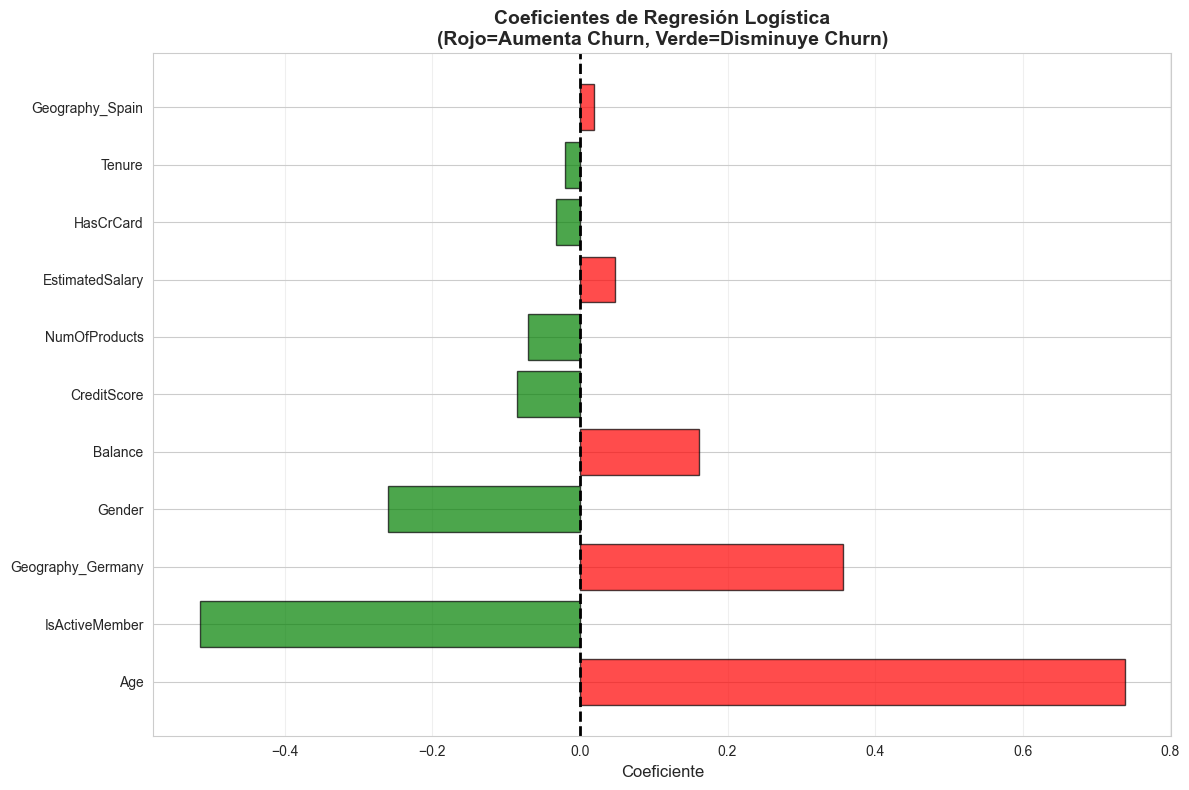

In [18]:
# Visualización de coeficientes
plt.figure(figsize=(12, 8))
colors = ['red' if c > 0 else 'green' for c in coeficientes['Coeficiente']]
plt.barh(coeficientes['Variable'], coeficientes['Coeficiente'], color=colors, alpha=0.7, edgecolor='black')
plt.axvline(x=0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Coeficiente', fontsize=12)
plt.title('Coeficientes de Regresión Logística\n(Rojo=Aumenta Churn, Verde=Disminuye Churn)', 
          fontsize=14, fontweight='bold')
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

### 6.3 Cálculo de Odds Ratios

Los **Odds Ratios** son más interpretables que los coeficientes:
- Se calculan como: $OR = e^{coeficiente}$
- OR > 1: Aumenta las odds de churn
- OR < 1: Disminuye las odds de churn
- OR = 1: No tiene efecto

In [19]:
# Calcular Odds Ratios
odds_ratios = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': modelo_lr.coef_[0],
    'Odds_Ratio': np.exp(modelo_lr.coef_[0]),
    'Cambio_%': (np.exp(modelo_lr.coef_[0]) - 1) * 100
}).sort_values('Odds_Ratio', ascending=False)

print("🎲 ODDS RATIOS")
print("=" * 70)
display(odds_ratios)

print("\n💡 INTERPRETACIÓN DE ODDS RATIOS (Top 5):")
print("=" * 70)
for idx, row in odds_ratios.head(5).iterrows():
    var = row['Variable']
    or_val = row['Odds_Ratio']
    cambio = row['Cambio_%']
    
    if or_val > 1:
        print(f"   • {var}: OR={or_val:.3f} → Por cada unidad que aumenta {var},")
        print(f"     las odds de churn aumentan un {cambio:.1f}%")
    else:
        print(f"   • {var}: OR={or_val:.3f} → Por cada unidad que aumenta {var},")
        print(f"     las odds de churn disminuyen un {abs(cambio):.1f}%")

🎲 ODDS RATIOS


,Variable,Coeficiente,Odds_Ratio,Cambio_%
2,Age,0.738847,2.093520,109.351968
9,Geography_Germany,0.356679,1.428578,42.857759
4,Balance,0.160622,1.174241,17.424121
8,EstimatedSalary,0.047725,1.048882,4.888247
10,Geography_Spain,0.018907,1.019087,1.908700
3,Tenure,-0.020071,0.980129,-1.987113
6,HasCrCard,-0.032208,0.968306,-3.169444
5,NumOfProducts,-0.070292,0.932122,-6.787808
0,CreditScore,-0.085986,0.917607,-8.239334
1,Gender,-0.260851,0.770396,-22.960431



💡 INTERPRETACIÓN DE ODDS RATIOS (Top 5):
   • Age: OR=2.094 → Por cada unidad que aumenta Age,
     las odds de churn aumentan un 109.4%
   • Geography_Germany: OR=1.429 → Por cada unidad que aumenta Geography_Germany,
     las odds de churn aumentan un 42.9%
   • Balance: OR=1.174 → Por cada unidad que aumenta Balance,
     las odds de churn aumentan un 17.4%
   • EstimatedSalary: OR=1.049 → Por cada unidad que aumenta EstimatedSalary,
     las odds de churn aumentan un 4.9%
   • Geography_Spain: OR=1.019 → Por cada unidad que aumenta Geography_Spain,
     las odds de churn aumentan un 1.9%


## 📈 7. Evaluación del Modelo

Ahora evaluamos el rendimiento del modelo usando múltiples métricas.

### 7.1 Predicciones

In [20]:
# Hacer predicciones
y_pred = modelo_lr.predict(X_test_scaled)                    # Predicciones binarias (0 o 1)
y_pred_proba = modelo_lr.predict_proba(X_test_scaled)[:, 1]  # Probabilidades de churn

print("🔮 PREDICCIONES")
print("=" * 70)
print(f"\nEjemplos de predicciones (primeros 10 clientes del test):")
predicciones_df = pd.DataFrame({
    'Real': y_test.values[:10],
    'Predicción': y_pred[:10],
    'Probabilidad_Churn': y_pred_proba[:10]
})
display(predicciones_df)

print("\n💡 Interpretación:")
print("   • Real: 1=Cliente abandonó, 0=Cliente se quedó")
print("   • Predicción: Lo que el modelo predice (umbral 0.5)")
print("   • Probabilidad_Churn: Confianza del modelo (0-1)")

🔮 PREDICCIONES

Ejemplos de predicciones (primeros 10 clientes del test):


,Real,Predicción,Probabilidad_Churn
0,0,0,0.118179
1,0,0,0.279476
2,0,0,0.112371
3,0,0,0.146706
4,0,0,0.095202
5,0,0,0.137029
6,0,0,0.086632
7,0,0,0.356268
8,0,0,0.355707
9,0,0,0.214598



💡 Interpretación:
   • Real: 1=Cliente abandonó, 0=Cliente se quedó
   • Predicción: Lo que el modelo predice (umbral 0.5)
   • Probabilidad_Churn: Confianza del modelo (0-1)


### 7.2 Matriz de Confusión

La **matriz de confusión** muestra cómo se distribuyen las predicciones:

```
                    Predicción
                No Churn  |  Churn
Real  No Churn     TN    |    FP
      Churn        FN    |    TP
```

- **TN (True Negative)**: Predijo correctamente No Churn ✅
- **TP (True Positive)**: Predijo correctamente Churn ✅
- **FP (False Positive)**: Predijo Churn pero no era (Falsa Alarma) ❌
- **FN (False Negative)**: Predijo No Churn pero sí era (Cliente perdido) ❌

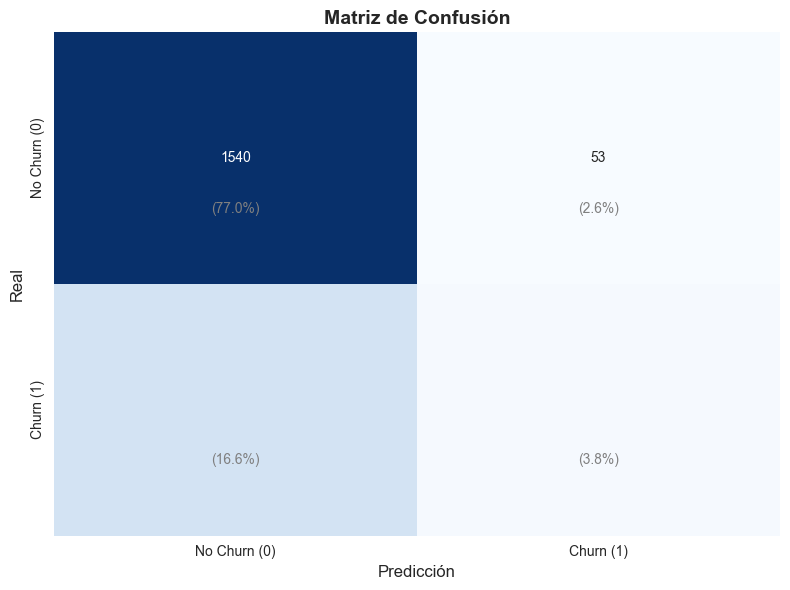


📊 MATRIZ DE CONFUSIÓN - DESGLOSE
True Negatives (TN):  1540 - Predijo No Churn y era correcto ✅
True Positives (TP):    76 - Predijo Churn y era correcto ✅
False Positives (FP):   53 - Predijo Churn pero NO era (Falsa Alarma) ⚠️
False Negatives (FN):  331 - Predijo No Churn pero SÍ era (Cliente Perdido) ❌

💡 EN EL CONTEXTO DE CHURN:
   • FP (Falsa Alarma): Activamos retención innecesaria ($53 clientes)
   • FN (Cliente Perdido): No detectamos churn real ($331 clientes perdidos)
   • FN es MÁS COSTOSO que FP en este problema


In [21]:
# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn (0)', 'Churn (1)'],
            yticklabels=['No Churn (0)', 'Churn (1)'])
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.title('Matriz de Confusión', fontsize=14, fontweight='bold')

# Añadir porcentajes
total = cm.sum()
for i in range(2):
    for j in range(2):
        percentage = cm[i, j] / total * 100
        plt.text(j+0.5, i+0.7, f'({percentage:.1f}%)', 
                ha='center', va='center', fontsize=10, color='gray')

plt.tight_layout()
plt.show()

# Descomponer la matriz
tn, fp, fn, tp = cm.ravel()

print("\n📊 MATRIZ DE CONFUSIÓN - DESGLOSE")
print("=" * 70)
print(f"True Negatives (TN):  {tn:4d} - Predijo No Churn y era correcto ✅")
print(f"True Positives (TP):  {tp:4d} - Predijo Churn y era correcto ✅")
print(f"False Positives (FP): {fp:4d} - Predijo Churn pero NO era (Falsa Alarma) ⚠️")
print(f"False Negatives (FN): {fn:4d} - Predijo No Churn pero SÍ era (Cliente Perdido) ❌")

print("\n💡 EN EL CONTEXTO DE CHURN:")
print(f"   • FP (Falsa Alarma): Activamos retención innecesaria (${fp} clientes)")
print(f"   • FN (Cliente Perdido): No detectamos churn real (${fn} clientes perdidos)")
print(f"   • FN es MÁS COSTOSO que FP en este problema")

### 7.3 Métricas de Clasificación

**Métricas principales:**

1. **Accuracy (Exactitud)**: % de predicciones correctas
   - Fórmula: $(TP + TN) / Total$
   - ⚠️ Puede ser engañosa con clases desbalanceadas

2. **Precision (Precisión)**: De los que predije como Churn, ¿cuántos realmente eran?
   - Fórmula: $TP / (TP + FP)$
   - Importante si queremos evitar falsas alarmas

3. **Recall (Sensibilidad)**: De los que realmente eran Churn, ¿cuántos detecté?
   - Fórmula: $TP / (TP + FN)$
   - Importante si queremos minimizar clientes perdidos

4. **F1-Score**: Media armónica de Precision y Recall
   - Fórmula: $2 \times \frac{Precision \times Recall}{Precision + Recall}$
   - Balance entre ambas métricas

In [22]:
# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)

# Generar reporte de clasificación
print("📊 REPORTE DE CLASIFICACIÓN")
print("=" * 70)
print(classification_report(y_test, y_pred, 
                           target_names=['No Churn', 'Churn'],
                           digits=4))

print("\n📈 RESUMEN DE MÉTRICAS PRINCIPALES")
print("=" * 70)
print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")

# Extraer métricas específicas para la clase Churn (clase 1)
report_dict = classification_report(y_test, y_pred, output_dict=True)
precision_churn = report_dict['1']['precision']
recall_churn = report_dict['1']['recall']
f1_churn = report_dict['1']['f1-score']

print(f"\nPara la clase CHURN (1):")
print(f"   Precision: {precision_churn:.4f} - De los que predije como churn, {precision_churn*100:.1f}% realmente lo eran")
print(f"   Recall:    {recall_churn:.4f} - De los churn reales, detecté {recall_churn*100:.1f}%")
print(f"   F1-Score:  {f1_churn:.4f} - Balance entre precision y recall")

print("\n💡 INTERPRETACIÓN:")
if recall_churn < 0.5:
    print("   ⚠️ RECALL BAJO: Estamos perdiendo muchos clientes (no los detectamos a tiempo)")
elif recall_churn < 0.7:
    print("   ✅ RECALL MODERADO: Detectamos una proporción razonable de churn")
else:
    print("   ✅ RECALL ALTO: Detectamos la mayoría de los casos de churn")

if precision_churn < 0.5:
    print("   ⚠️ PRECISION BAJA: Muchas falsas alarmas (activamos retención innecesaria)")
elif precision_churn < 0.7:
    print("   ✅ PRECISION MODERADA: Balance aceptable de falsas alarmas")
else:
    print("   ✅ PRECISION ALTA: Pocas falsas alarmas")

📊 REPORTE DE CLASIFICACIÓN
              precision    recall  f1-score   support

    No Churn     0.8231    0.9667    0.8891      1593
       Churn     0.5891    0.1867    0.2836       407

    accuracy                         0.8080      2000
   macro avg     0.7061    0.5767    0.5864      2000
weighted avg     0.7755    0.8080    0.7659      2000


📈 RESUMEN DE MÉTRICAS PRINCIPALES
Accuracy:  0.8080 (80.80%)

Para la clase CHURN (1):
   Precision: 0.5891 - De los que predije como churn, 58.9% realmente lo eran
   Recall:    0.1867 - De los churn reales, detecté 18.7%
   F1-Score:  0.2836 - Balance entre precision y recall

💡 INTERPRETACIÓN:
   ⚠️ RECALL BAJO: Estamos perdiendo muchos clientes (no los detectamos a tiempo)
   ✅ PRECISION MODERADA: Balance aceptable de falsas alarmas


### 7.4 Curva ROC y AUC

**ROC (Receiver Operating Characteristic)**:
- Muestra el trade-off entre True Positive Rate y False Positive Rate
- Permite evaluar el modelo a diferentes umbrales de decisión

**AUC (Area Under the Curve)**:
- Métrica única que resume el rendimiento del modelo
- Rango: 0 a 1
- Interpretación:
  - AUC = 0.5: Modelo aleatorio (línea diagonal)
  - AUC = 0.7-0.8: Buen modelo
  - AUC > 0.8: Muy buen modelo
  - AUC = 1.0: Modelo perfecto

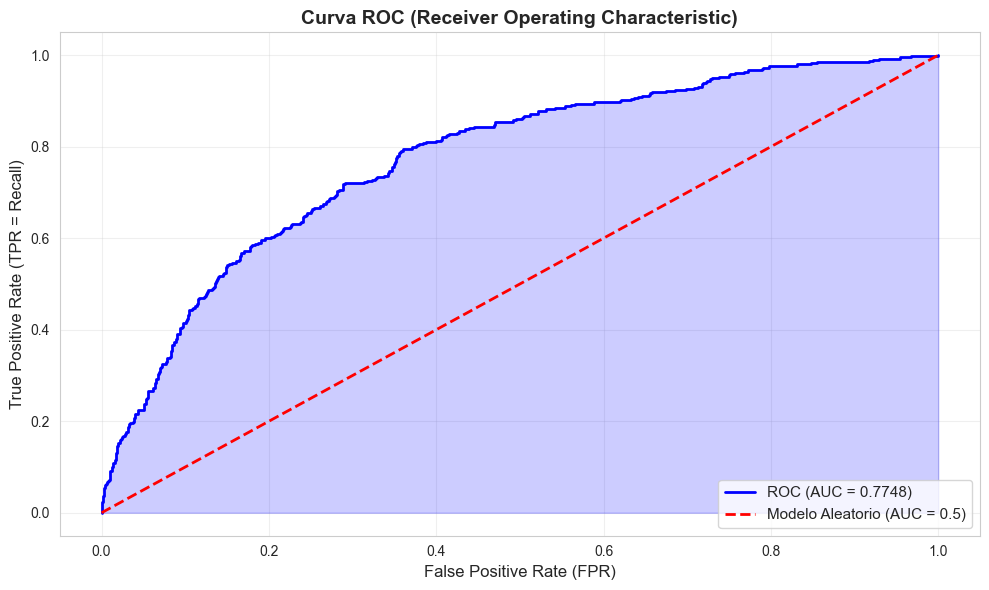

📊 CURVA ROC Y AUC
AUC Score: 0.7748

💡 INTERPRETACIÓN DEL AUC:
   ✅ AUC 0.7-0.8: Buen modelo, rendimiento sólido

   Significado: El modelo tiene un 77.5% de probabilidad de
   clasificar correctamente un cliente con churn vs uno sin churn


In [23]:
# Calcular ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Visualizar curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', linewidth=2, label=f'ROC (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2, label='Modelo Aleatorio (AUC = 0.5)')
plt.fill_between(fpr, tpr, alpha=0.2, color='blue')
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR = Recall)', fontsize=12)
plt.title('Curva ROC (Receiver Operating Characteristic)', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 CURVA ROC Y AUC")
print("=" * 70)
print(f"AUC Score: {auc_score:.4f}")

print("\n💡 INTERPRETACIÓN DEL AUC:")
if auc_score < 0.6:
    print("   ⚠️ AUC < 0.6: Modelo pobre, apenas mejor que azar")
elif auc_score < 0.7:
    print("   ✅ AUC 0.6-0.7: Modelo aceptable, hay margen de mejora")
elif auc_score < 0.8:
    print("   ✅ AUC 0.7-0.8: Buen modelo, rendimiento sólido")
elif auc_score < 0.9:
    print("   ✅✅ AUC 0.8-0.9: Muy buen modelo, excelente capacidad discriminativa")
else:
    print("   ✅✅✅ AUC > 0.9: Modelo excepcional")

print(f"\n   Significado: El modelo tiene un {auc_score*100:.1f}% de probabilidad de")
print("   clasificar correctamente un cliente con churn vs uno sin churn")

## 📊 8. Análisis de Resultados y Conclusiones

Consolidemos todos los hallazgos del análisis.

In [24]:
print("=" * 80)
print("📋 RESUMEN EJECUTIVO - MODELO DE PREDICCIÓN DE CHURN")
print("=" * 80)

print("\n🎯 CONTEXTO DEL PROBLEMA")
print("-" * 80)
print(f"   • Clientes totales: {len(df):,}")
print(f"   • Tasa de churn actual: {(df['Exited'].sum() / len(df)) * 100:.1f}%")
print(f"   • Objetivo: Reducir churn del 20% al 15%")
print(f"   • Desbalanceo de clases: {(df['Exited'].value_counts()[0] / df['Exited'].value_counts()[1]):.1f}:1")

print("\n📊 RENDIMIENTO DEL MODELO")
print("-" * 80)
print(f"   • Accuracy: {accuracy:.4f} ({accuracy*100:.1f}%)")
print(f"   • Precision (Churn): {precision_churn:.4f} - {precision_churn*100:.1f}% de predicciones positivas son correctas")
print(f"   • Recall (Churn): {recall_churn:.4f} - Detectamos {recall_churn*100:.1f}% de los churns reales")
print(f"   • F1-Score (Churn): {f1_churn:.4f}")
print(f"   • AUC: {auc_score:.4f}")

print("\n🔍 FACTORES MÁS INFLUYENTES EN EL CHURN")
print("-" * 80)
top_5_factors = odds_ratios.head(5)
for idx, row in top_5_factors.iterrows():
    direction = "aumenta" if row['Odds_Ratio'] > 1 else "disminuye"
    print(f"   {idx+1}. {row['Variable']:20s}: OR={row['Odds_Ratio']:.3f} ({direction} churn)")

print("\n💰 IMPACTO DE NEGOCIO")
print("-" * 80)
clientes_churn_detectados = tp
clientes_churn_perdidos = fn
tasa_deteccion = recall_churn
print(f"   • Clientes en riesgo detectados: {clientes_churn_detectados} (pueden ser retenidos)")
print(f"   • Clientes en riesgo NO detectados: {clientes_churn_perdidos} (pérdida potencial)")
print(f"   • Tasa de detección: {tasa_deteccion*100:.1f}%")

# Estimación de valor (asumiendo valor promedio por cliente)
valor_cliente_anual = 1000  # USD (ejemplo)
valor_salvado = clientes_churn_detectados * valor_cliente_anual * 0.3  # 30% tasa de retención
valor_perdido = clientes_churn_perdidos * valor_cliente_anual
print(f"\n   Estimación (valor cliente = ${valor_cliente_anual}/año, tasa retención = 30%):")
print(f"   • Valor potencial salvado: ${valor_salvado:,.0f}")
print(f"   • Valor potencial perdido: ${valor_perdido:,.0f}")

print("\n✅ FORTALEZAS DEL MODELO")
print("-" * 80)
print("   • Interpretable: Podemos explicar por qué un cliente tiene riesgo de churn")
print("   • Rápido: Predicciones en tiempo real")
print("   • Baseline sólido: Buen punto de partida para modelos más complejos")
if auc_score > 0.7:
    print("   • Buen poder discriminativo: AUC > 0.7")

print("\n⚠️ LIMITACIONES Y ÁREAS DE MEJORA")
print("-" * 80)
if recall_churn < 0.7:
    print(f"   • Recall relativamente bajo ({recall_churn*100:.1f}%): Perdemos muchos clientes")
if accuracy < 0.85:
    print(f"   • Accuracy moderada ({accuracy*100:.1f}%): Hay espacio para mejora")
print("   • Asume relaciones lineales: Puede perder patrones no lineales")
print("   • Desbalanceo de clases: Requiere técnicas de balanceo (SMOTE, ajuste de pesos)")

print("\n🎯 RECOMENDACIONES PARA FINANCEGUARD")
print("-" * 80)
print("   1. ACCIÓN INMEDIATA: Implementar este modelo en producción como baseline")
print("   2. SEGMENTACIÓN: Priorizar clientes con alta probabilidad de churn (> 0.7)")
print("   3. ESTRATEGIAS DE RETENCIÓN: Enfocarse en factores identificados (top 5)")
print("   4. MONITOREO: Trackear efectividad de campañas de retención")
print("   5. A/B TESTING: Probar diferentes umbrales de decisión")

print("\n🔬 PRÓXIMOS PASOS TÉCNICOS")
print("-" * 80)
print("   • Aplicar técnicas de balanceo de clases (SMOTE, class_weight)")
print("   • Probar modelos más complejos (Gradient Boosting, Random Forest, XGBoost)")
print("   • Feature engineering: Crear variables derivadas")
print("   • Optimización de hiperparámetros con GridSearchCV")
print("   • Validación cruzada para evaluar robustez")
print("   • Análisis de feature importance con otros algoritmos")

print("\n" + "=" * 80)
print("✅ ANÁLISIS COMPLETADO - AVANCE 1 DEL PROYECTO INTEGRADOR")
print("=" * 80)

📋 RESUMEN EJECUTIVO - MODELO DE PREDICCIÓN DE CHURN

🎯 CONTEXTO DEL PROBLEMA
--------------------------------------------------------------------------------
   • Clientes totales: 10,000
   • Tasa de churn actual: 20.4%
   • Objetivo: Reducir churn del 20% al 15%
   • Desbalanceo de clases: 3.9:1

📊 RENDIMIENTO DEL MODELO
--------------------------------------------------------------------------------
   • Accuracy: 0.8080 (80.8%)
   • Precision (Churn): 0.5891 - 58.9% de predicciones positivas son correctas
   • Recall (Churn): 0.1867 - Detectamos 18.7% de los churns reales
   • F1-Score (Churn): 0.2836
   • AUC: 0.7748

🔍 FACTORES MÁS INFLUYENTES EN EL CHURN
--------------------------------------------------------------------------------
   3. Age                 : OR=2.094 (aumenta churn)
   10. Geography_Germany   : OR=1.429 (aumenta churn)
   5. Balance             : OR=1.174 (aumenta churn)
   9. EstimatedSalary     : OR=1.049 (aumenta churn)
   11. Geography_Spain     : OR=1.01

## 📝 9. Ejemplo de Predicción en Nuevos Clientes

Veamos cómo usar el modelo para predecir el riesgo de churn de nuevos clientes.

In [25]:
# Tomar algunos ejemplos del conjunto de test para demostrar
ejemplos = X_test.iloc[:5].copy()
ejemplos_scaled = X_test_scaled.iloc[:5]
ejemplos_reales = y_test.iloc[:5]

# Hacer predicciones
predicciones_ejemplos = modelo_lr.predict(ejemplos_scaled)
probabilidades_ejemplos = modelo_lr.predict_proba(ejemplos_scaled)[:, 1]

print("🔮 EJEMPLO DE PREDICCIONES EN CLIENTES")
print("=" * 80)
print("\nPerfil de clientes y predicciones:\n")

for i in range(len(ejemplos)):
    print(f"\nCliente #{i+1}:")
    print("-" * 40)
    print(f"   Edad: {ejemplos.iloc[i]['Age']:.0f} años")
    print(f"   Balance: ${ejemplos.iloc[i]['Balance']:,.2f}")
    print(f"   Credit Score: {ejemplos.iloc[i]['CreditScore']:.0f}")
    print(f"   Productos: {ejemplos.iloc[i]['NumOfProducts']:.0f}")
    print(f"   Miembro Activo: {'Sí' if ejemplos.iloc[i]['IsActiveMember'] == 1 else 'No'}")
    print(f"\n   → Probabilidad de Churn: {probabilidades_ejemplos[i]:.1%}")
    print(f"   → Predicción: {'🔴 CHURN' if predicciones_ejemplos[i] == 1 else '🟢 NO CHURN'}")
    print(f"   → Real: {'🔴 CHURN' if ejemplos_reales.iloc[i] == 1 else '🟢 NO CHURN'}")
    print(f"   → Resultado: {'✅ CORRECTO' if predicciones_ejemplos[i] == ejemplos_reales.iloc[i] else '❌ INCORRECTO'}")
    
    if probabilidades_ejemplos[i] > 0.7:
        print("   ⚠️ ACCIÓN: Contactar URGENTE para retención")
    elif probabilidades_ejemplos[i] > 0.5:
        print("   ⚠️ ACCIÓN: Incluir en campaña de retención")
    else:
        print("   ✅ ACCIÓN: Cliente estable, seguimiento rutinario")

🔮 EJEMPLO DE PREDICCIONES EN CLIENTES

Perfil de clientes y predicciones:


Cliente #1:
----------------------------------------
   Edad: 36 años
   Balance: $0.00
   Credit Score: 585
   Productos: 2
   Miembro Activo: No

   → Probabilidad de Churn: 11.8%
   → Predicción: 🟢 NO CHURN
   → Real: 🟢 NO CHURN
   → Resultado: ✅ CORRECTO
   ✅ ACCIÓN: Cliente estable, seguimiento rutinario

Cliente #2:
----------------------------------------
   Edad: 33 años
   Balance: $131,023.76
   Credit Score: 525
   Productos: 2
   Miembro Activo: No

   → Probabilidad de Churn: 27.9%
   → Predicción: 🟢 NO CHURN
   → Real: 🟢 NO CHURN
   → Resultado: ✅ CORRECTO
   ✅ ACCIÓN: Cliente estable, seguimiento rutinario

Cliente #3:
----------------------------------------
   Edad: 40 años
   Balance: $0.00
   Credit Score: 557
   Productos: 2
   Miembro Activo: Sí

   → Probabilidad de Churn: 11.2%
   → Predicción: 🟢 NO CHURN
   → Real: 🟢 NO CHURN
   → Resultado: ✅ CORRECTO
   ✅ ACCIÓN: Cliente estable, segui

---

## 🎓 Conclusión del Avance 1

### Lo que hemos logrado:

✅ **Comprensión del problema**: Entendimos qué es el churn bancario y su impacto

✅ **EDA completo**: Analizamos el dataset, identificamos patrones y relaciones

✅ **Preparación de datos**: Limpieza, encoding, escalamiento y split train/test

✅ **Modelo baseline**: Implementamos Regresión Logística con scikit-learn

✅ **Interpretación**: Análisis de coeficientes y odds ratios

✅ **Evaluación exhaustiva**: Matriz de confusión, precision, recall, F1, ROC-AUC

### Próximo Avance:

En el **Avance 2** trabajaremos en:
- Modelos de Gradient Boosting (XGBoost, LightGBM)
- Optimización de hiperparámetros
- Técnicas de balanceo de clases
- Feature engineering avanzado
- Comparación de múltiples modelos

---

**Desarrollado por:** [Tu Nombre]  
**Fecha:** Febrero 2026  
**Curso:** Data Science - Henry  
**Módulo 4 - Clase 03:** Regresión Logística y Clasificación Binaria